# Aufgaben zur instationäre Wärmeleitung in einer Wand

## Aufgabe 1.3

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from odesolve import *
from instationaer_ar import *
from instationaer_hilfsfunktionen import *

## Funktion zur Berechnung

In [2]:
def solve(hx, ht):
    wall = [
        WallLayer(0.115, 1.00, 1000, 1800),
        WallLayer(0.200, 0.04, 900, 50),
        WallLayer(0.250, 2.30, 1000, 2400)
    ]
    
    def ti(t):
        return 20
    
    def ta(t):
        ω = 2 * pi / (24 * 60 * 60)
        return 5 - 10 * cos(ω * t)
    
    rbi = Boundary(7.5, ti)
    rba = Boundary(25.0, ta)
    
    A, r = compute_ar(refine_wall_layers(wall, hx), rba, rbi)
    
    def F(t, theta):
        return -A @ theta + r(t)
    
    return rungekutta(F, [0, 72 * 3600], ht, np.linalg.solve(A, r(0)))


## Schichtdicken und Zeitschrittweiten

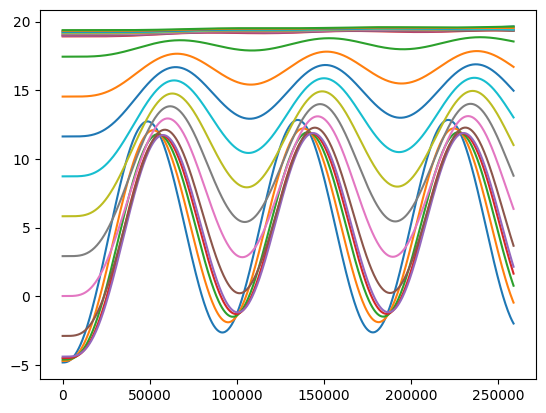

In [11]:
t, theta = solve(0.025, 469)
plot_sol(t, theta)

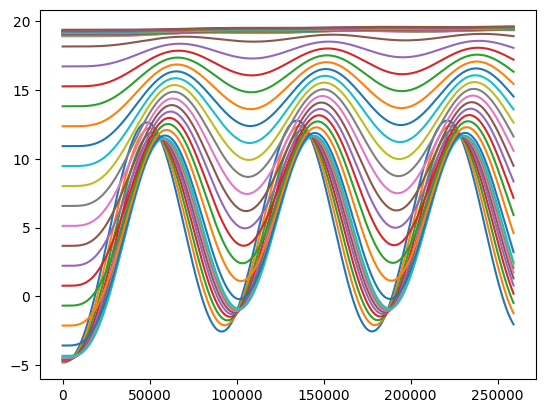

In [9]:
t, theta = solve(0.0125, 114)
plot_sol(t, theta)

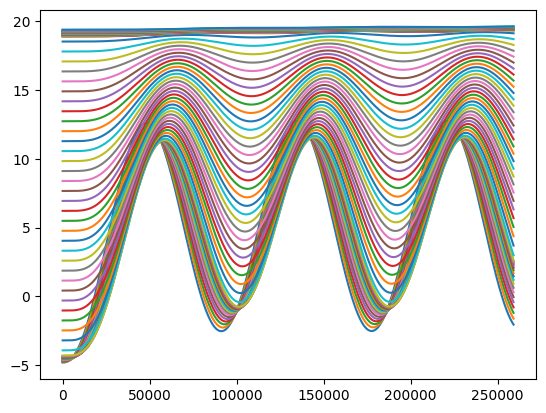

In [7]:
t, theta = solve(0.00625, 28)
plot_sol(t, theta)

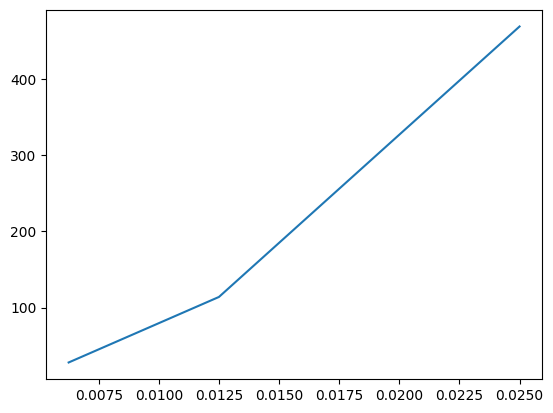

In [12]:
plt.plot([0.025, 0.0125, 0.00625], [469, 114, 28])